# Group Presentation 2
## Group 4 Members
* Shyam Akhil Nekkanti - 8982123
* Jun He (Helena) - 8903073
* Zheming Li (Brendan) - 8914152



## Introduction 
"Heart disease, also referred as cardiovascular diseases, is broad term used for diseases and conditions affecting the heart and circulatory system. It is a major cause of disability all around the world. Since heart is amongst the most vital organs of the body, its diseases affect other organs and part of the body as well. There are several different types and forms of heart diseases. The most common ones cause narrowing or blockage of the coronary arteries, malfunctioning in the valves of the heart, enlargement in the size of heart and several others leading to heart failure and heart attack

## objective 
we aim to test if certain categorical variables are associated with heart disease using the Chi-Square test. 

### Import all necessary libraries

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler


# Import the data set.

## Dataset from Kaggle [Heart Disease Predictions](https://www.kaggle.com/code/desalegngeb/heart-disease-predictions/notebook)



In [5]:
## We use the Pandas library to load the dataset into a DataFrame. The dataset contains various features such as age, sex, cholesterol levels, and a target variable (target), 
# which indicates whether a person has heart disease.

data = pd.read_csv('dataset/heart.csv')

# Preview the data
print(data.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [6]:
# Summary statistics
desc_heart = data.iloc[:, 2:4].describe()
desc_heart.round(2)

# Additional summary
desc_heart.describe()



,cp,trestbps
count,8.000000,8.000000
mean,38.874881,142.020238
std,106.727255,82.651953
min,0.000000,17.538143
25%,0.725248,113.500000
50%,1.016026,130.811881
75%,2.250000,155.000000
max,303.000000,303.000000


## Data pre-processing 
### Based on our investigation we did above, we will drop 7 rows


In [12]:
data = data[data['ca'] < 4] #drop the wrong ca values
data = data[data['thal'] > 0] # drop the wong thal value
print(f'The length of the data now is {len(data)} instead of 303!')


KeyError: 'ca'

In [15]:
# Rename columns for the sake of clarity
data = data.rename(
    columns = {'cp':'chest_pain_type', 
               'trestbps':'resting_blood_pressure', 
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram', 
               'thalach': 'max_heart_rate_achieved', 
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression', 
               'slope': 'st_slope', 
               'ca':'num_major_vessels', 
               'thal': 'thalassemia'}, 
    errors="raise")

data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

data['chest_pain_type'][data['chest_pain_type'] == 0] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 1] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'asymptomatic'

data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 0] = 'normal'
data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 1] = 'ST-T wave abnormality'
data['resting_electrocardiogram'][data['resting_electrocardiogram'] == 2] = 'left ventricular hypertrophy'

data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

data['st_slope'][data['st_slope'] == 0] = 'upsloping'
data['st_slope'][data['st_slope'] == 1] = 'flat'
data['st_slope'][data['st_slope'] == 2] = 'downsloping'

data['thalassemia'][data['thalassemia'] == 1] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 2] = 'normal'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'

KeyError: "['cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'] not found in axis"

In [14]:
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_electrocardiogram',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

## Target distribution
We observe that the target is fairly balanced with ~46% with no heart disease and ~54% with heart disease. So no need to worry about target imbalance.

C:\Windows\Temp\ipykernel_30608\749100919.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data['target'], palette=mypal[1::4])


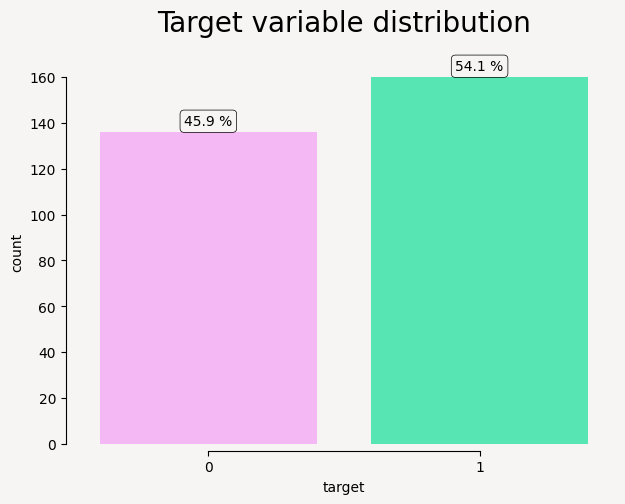

In [16]:
mypal= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']

plt.figure(figsize=(7, 5),facecolor='#F6F5F4')
total = float(len(data))
ax = sns.countplot(x=data['target'], palette=mypal[1::4])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Target variable distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

## Distribution of Categorical Features

In [18]:
def count_plot(data, cat_feats):    
    L = len(cat_feats)
    ncol= 2
    nrow= int(np.ceil(L/ncol))
    remove_last= (nrow * ncol) - L

    fig, ax = plt.subplots(nrow, ncol,figsize=(18, 24), facecolor='#F6F5F4')    
    fig.subplots_adjust(top=0.92)
    ax.flat[-remove_last].set_visible(False)

    i = 1
    for col in cat_feats:
        plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
        ax = sns.countplot(data=data, x=col, hue="target", palette=mypal[1::4])
        ax.set_xlabel(col, fontsize=20)
        ax.set_ylabel("count", fontsize=20)
        sns.despine(right=True)
        sns.despine(offset=0, trim=False) 
        plt.legend(facecolor='#F6F5F4')
        
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.0f}'.format((height)),ha="center",
                  bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
        
        i = i +1

    plt.suptitle('Distribution of Categorical Features' ,fontsize = 24)
    return 0

count_plot(data, cat_feats[0:-1]);

NameError: name 'cat_feats' is not defined

## Normality Tests

Shapiro-Wilk test for hardness: ShapiroResult(statistic=0.8878665092672475, pvalue=4.2766427574844864e-05)
Shapiro-Wilk test for mortality: ShapiroResult(statistic=0.9855428611362897, pvalue=0.688411507281031)


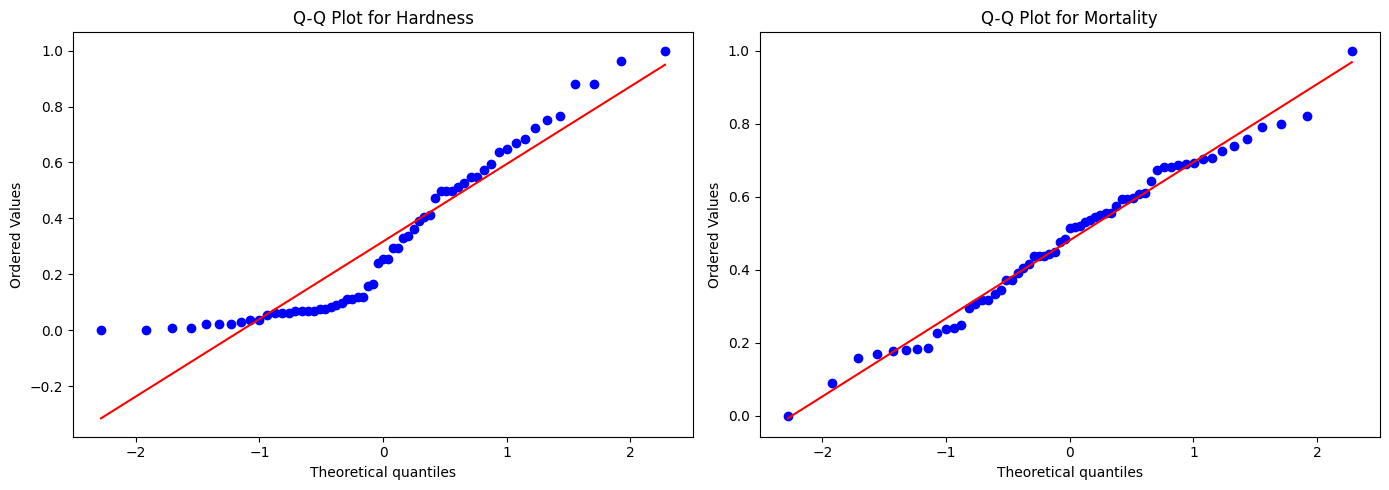

In [42]:
# Shapiro-Wilk test for normality
shapiro_hardness = stats.shapiro(data['hardness'])
shapiro_mortality = stats.shapiro(data['mortality'])
print(f"Shapiro-Wilk test for hardness: {shapiro_hardness}")
print(f"Shapiro-Wilk test for mortality: {shapiro_mortality}")

# Q-Q plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Q-Q plot for hardness
stats.probplot(data['hardness'], dist="norm", plot=axes[0])
axes[0].set_title('Q-Q Plot for Hardness')

# Q-Q plot for mortality
stats.probplot(data['mortality'], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot for Mortality')

plt.tight_layout()
plt.show()


## Comparing Mortality and Hardness by Location

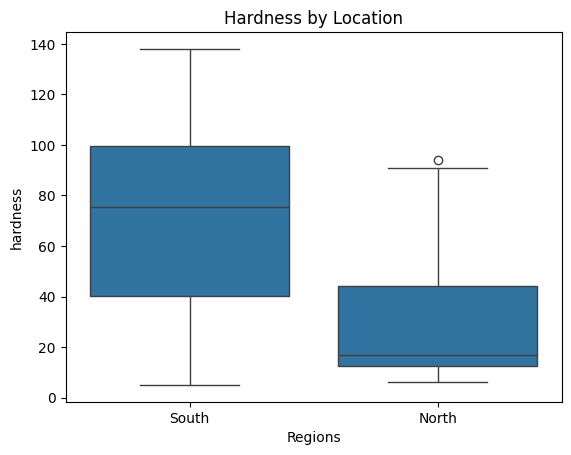

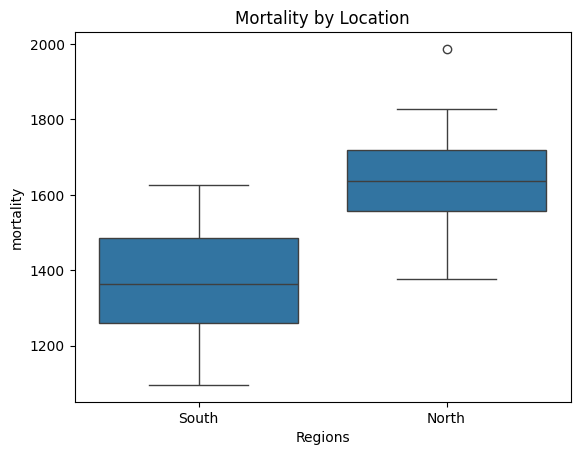

In [27]:
# Box plots
sns.boxplot(x='location', y='hardness', data=water)
plt.title('Hardness by Location')
plt.xlabel('Regions')
plt.show()

sns.boxplot(x='location', y='mortality', data=water)
plt.title('Mortality by Location')
plt.xlabel('Regions')
plt.show()


## T-Test and Variance Test

In [28]:
# Variance test
res_ftest = stats.levene(water['mortality'][water['location'] == 'North'],
                         water['mortality'][water['location'] == 'South'])
print(f"Variance test result: {res_ftest}")

# T-Test
res_ttest = stats.ttest_ind(water['mortality'][water['location'] == 'North'],
                            water['mortality'][water['location'] == 'South'],
                            equal_var=True)
print(f"T-Test result: {res_ttest}")


Variance test result: LeveneResult(statistic=0.15211236805253087, pvalue=0.6979292987506827)
T-Test result: TtestResult(statistic=7.168550664340207, pvalue=1.402156406653404e-09, df=59.0)


## Non-Parametric Test for Hardness

In [29]:
# Wilcoxon test
res_wilcox = stats.mannwhitneyu(water['hardness'][water['location'] == 'North'],
                                water['hardness'][water['location'] == 'South'])
print(f"Wilcoxon test result: {res_wilcox}")


Wilcoxon test result: MannwhitneyuResult(statistic=202.5, pvalue=0.00023626877198952478)


## Correlation Tests

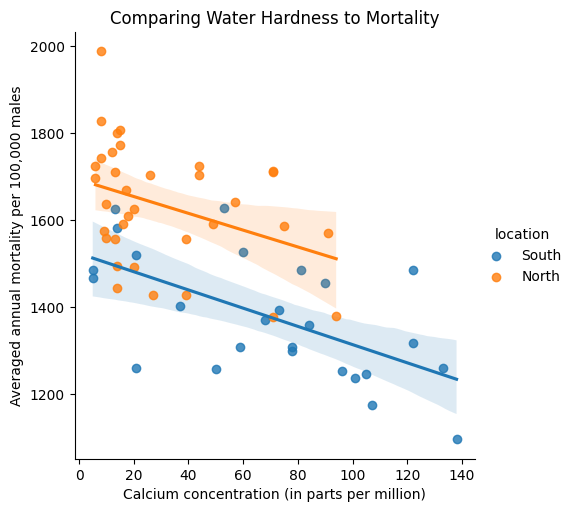

Pearson correlation: PearsonRResult(statistic=-0.6548486232042466, pvalue=1.0331339260349402e-08)
Spearman correlation: SignificanceResult(statistic=-0.6316646189166502, pvalue=4.79546153722838e-08)


In [30]:
# Scatter plot with regression line
sns.lmplot(x='hardness', y='mortality', hue='location', data=water)
plt.xlabel('Calcium concentration (in parts per million)')
plt.ylabel('Averaged annual mortality per 100,000 males')
plt.title('Comparing Water Hardness to Mortality')
plt.show()

# Pearson correlation
pearson_corr = stats.pearsonr(water['hardness'], water['mortality'])
print(f"Pearson correlation: {pearson_corr}")

# Spearman correlation
spearman_corr = stats.spearmanr(water['hardness'], water['mortality'])
print(f"Spearman correlation: {spearman_corr}")


## Comparing Categorical Data

Chi-Square test result: Chi2ContingencyResult(statistic=58.9554945054945, pvalue=0.40384377361336427, dof=57, expected_freq=array([[0.57377049, 0.57377049, 0.57377049, 0.57377049, 0.57377049,
        0.57377049, 0.57377049, 0.57377049, 0.57377049, 0.57377049,
        0.57377049, 0.57377049, 0.57377049, 0.57377049, 0.57377049,
        0.57377049, 0.57377049, 0.57377049, 0.57377049, 0.57377049,
        0.57377049, 0.57377049, 0.57377049, 0.57377049, 1.14754098,
        0.57377049, 0.57377049, 0.57377049, 0.57377049, 0.57377049,
        0.57377049, 0.57377049, 0.57377049, 0.57377049, 0.57377049,
        0.57377049, 1.14754098, 0.57377049, 1.14754098, 0.57377049,
        0.57377049, 0.57377049, 0.57377049, 0.57377049, 0.57377049,
        0.57377049, 0.57377049, 0.57377049, 0.57377049, 0.57377049,
        0.57377049, 0.57377049, 0.57377049, 0.57377049, 0.57377049,
        0.57377049, 0.57377049, 0.57377049],
       [0.42622951, 0.42622951, 0.42622951, 0.42622951, 0.42622951,
        0.42622

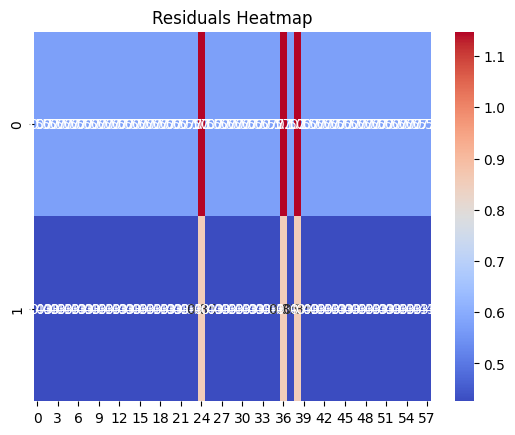

In [31]:
# Chi-Square test for water data
# Assuming 'location' and 'mortality' are categorical for this example

# Create a contingency table
contingency_table = pd.crosstab(water['location'], water['mortality'])

# Chi-Square test
chi2_test = stats.chi2_contingency(contingency_table)
print(f"Chi-Square test result: {chi2_test}")

# Residuals
residuals = chi2_test[3]
print(f"Residuals: {residuals}")

# Graphing the residuals
sns.heatmap(residuals, annot=True, cmap='coolwarm')
plt.title('Residuals Heatmap')
plt.show()


# Normalization

### Most of the time, our raw data will not be normalized.

Min-max normalization scales data to a fixed range, typically [0, 1], ensuring that no single feature dominates due to its scale. This is crucial when features have different units or ranges, as it prevents biased model performance. It also improves the efficiency of gradient-based optimization algorithms, leading to faster and more stable convergence. Additionally, normalization enhances data visualization, making it easier to compare and interpret relationships between features. Overall, min-max normalization is essential for improving the performance, efficiency, and interpretability of data analysis and machine learning models.

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


### Step 1 - graph the raw data (not normalized)

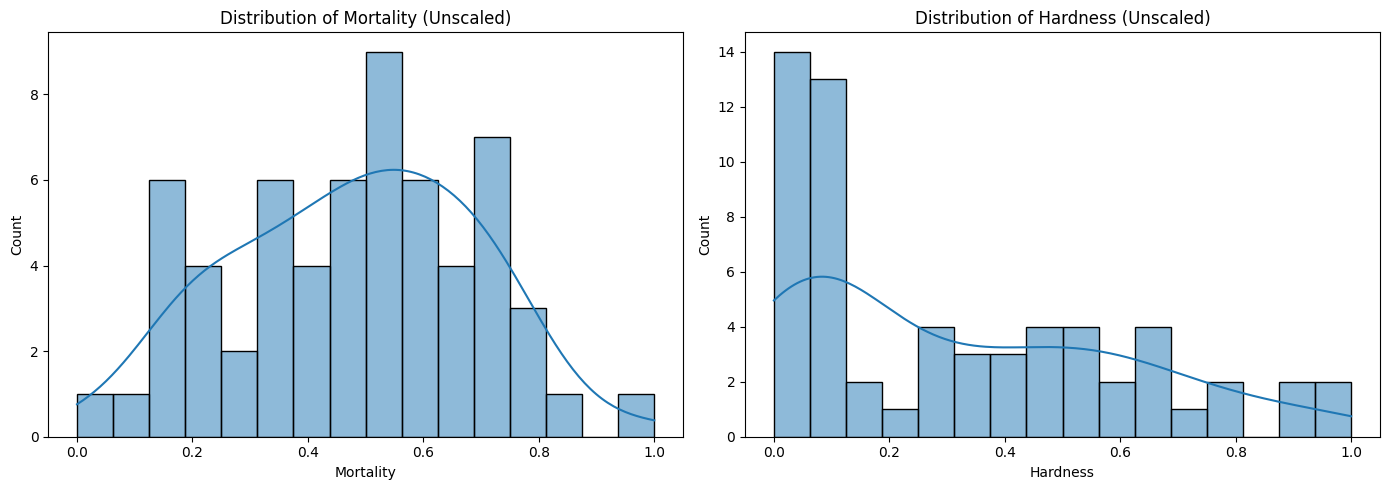

In [39]:
# Graph the unscaled data
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(water['mortality'], bins=16, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Mortality (Unscaled)')
axes[0].set_xlabel('Mortality')

sns.histplot(water['hardness'], bins=16, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Hardness (Unscaled)')
axes[1].set_xlabel('Hardness')

plt.tight_layout()
plt.show()


## Step 2 - Apply the Min-Max scaler

In [35]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select the columns to normalize
columns_to_normalize = ['mortality', 'hardness']

# Apply the scaler to the selected columns
water[columns_to_normalize] = scaler.fit_transform(water[columns_to_normalize])

# Display the first few rows of the normalized dataset
water.head()


,location,town,mortality,hardness
0,South,Bath,0.169473,0.751880
1,North,Birkenhead,0.641975,0.090226
2,South,Birmingham,0.415264,0.000000
3,North,Blackburn,0.790123,0.067669
4,North,Blackpool,0.575758,0.097744


## Step 3 - Graph the normalized data

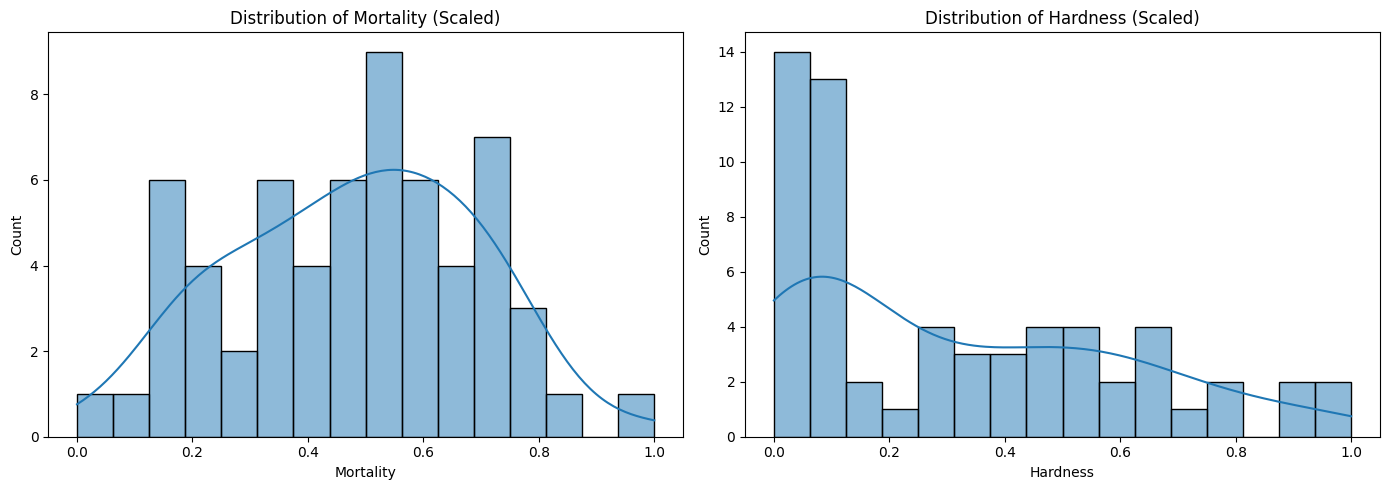

In [40]:
# Graph the scaled data
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(water['mortality'], bins=16, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Mortality (Scaled)')
axes[0].set_xlabel('Mortality')

sns.histplot(water['hardness'], bins=16, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Hardness (Scaled)')
axes[1].set_xlabel('Hardness')

plt.tight_layout()
plt.show()


In [2]:
import numpy as np
from scipy import stats

# Sample data
without_spice = np.array([5, 6, 6, 7, 5, 6, 6])
with_spice = np.array([7, 8, 7, 9, 8, 9, 7])

# Step 1: Calculate the means
mean_without_spice = np.mean(without_spice)
mean_with_spice = np.mean(with_spice)

# Step 2: Calculate the variances
var_without_spice = np.var(without_spice, ddof=1)  # Use ddof=1 for sample variance
var_with_spice = np.var(with_spice, ddof=1)

# Sample sizes
n1 = len(without_spice)
n2 = len(with_spice)

# Step 3: Calculate the t-statistic manually
t_statistic_manual = (mean_without_spice - mean_with_spice) / np.sqrt((var_without_spice / n1) + (var_with_spice / n2))

# Verify p-value using the scipy library
p_value_manual = stats.ttest_ind(without_spice, with_spice)[1]

# Return calculated means, variances, t-statistic and p-value
mean_without_spice, mean_with_spice, var_without_spice, var_with_spice, t_statistic_manual, p_value_manual


(5.857142857142857,
 7.857142857142857,
 0.4761904761904763,
 0.8095238095238094,
 -4.666666666666667,
 0.0005446049826671294)

# T-score

Let's consider an example where you are analyzing the prices of houses in a specific neighborhood in Canada, like Elmira.

Suppose you collect the following sample data of house prices (in thousands of Dollars) from 10 houses:

[450,470,430,490,410,460,440,480,500,455]

And you know the mean and the size of the sample, but not the standard deviation.

* Sample mean (𝑥 ̅) = 458.5 thousand Dollars
* Sample size (n) = 10

Suppose you want to determine the T-score for a house priced at 500 thousand Dollars.

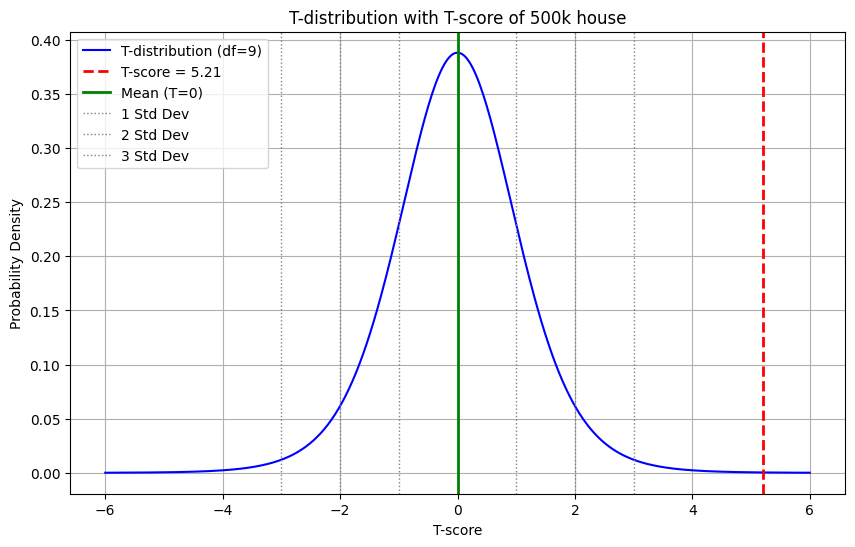

(5.205653427091938, 0.00027990640818742474)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Given values
X = 500  # price of the house in thousand dollars
X_bar = 458.5  # sample mean in thousand dollars
s = 25.21  # sample standard deviation in thousand dollars
n = 10  # sample size
df = n - 1  # degrees of freedom

# T-score calculation
T = (X - X_bar) / (s / np.sqrt(n))

# Calculate the cumulative probability (two-tailed) using the t-distribution
p_value = 1 - stats.t.cdf(T, df=df)

# Create a plot of the t-distribution
x = np.linspace(-6, 6, 400)
y = stats.t.pdf(x, df=df)

# Plotting the t-distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='T-distribution (df=9)', color='blue')

# Mark the T-score (outlier) on the plot
plt.axvline(T, color='red', linestyle='--', label=f'T-score = {T:.2f}', linewidth=2)

# Mark the mean and standard deviations
plt.axvline(0, color='green', linestyle='-', label='Mean (T=0)', linewidth=2)
for i in range(1, 4):
    plt.axvline(i, color='gray', linestyle=':', label=f'{i} Std Dev', linewidth=1)
    plt.axvline(-i, color='gray', linestyle=':', linewidth=1)

# Add labels and a legend
plt.title('T-distribution with T-score of 500k house')
plt.xlabel('T-score')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# T-score and p-value output
T, p_value


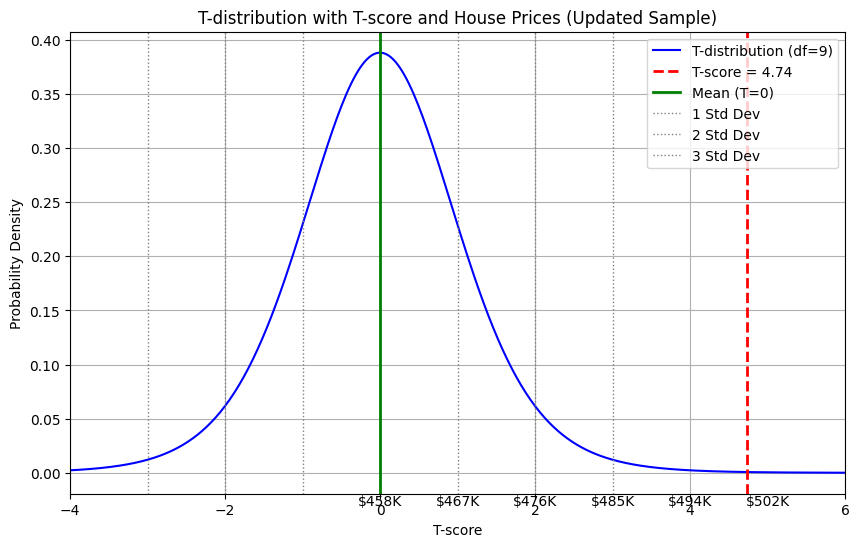

(458.5, 27.693761832666297, 4.738775601882641, 0.0005303763563409003)

In [2]:
# Given sample of house prices in thousands of dollars
house_prices = np.array([450, 470, 430, 490, 410, 460, 440, 480, 500, 455])

# Recalculate the sample mean, sample standard deviation, and sample size
X_bar = np.mean(house_prices)
s = np.std(house_prices, ddof=1)  # Sample standard deviation (using ddof=1 for sample)
n = len(house_prices)

# Recalculate the T-score for the house priced at 500K
X = 500  # Price to analyze in thousand dollars
T = (X - X_bar) / (s / np.sqrt(n))

# Calculate the cumulative probability (two-tailed) using the t-distribution
# NOTE that stats.t.cdf makes no use of the standard deviation (s) variable
#       it only relies on the degrees of freedom (df)
df = n - 1
p_value = 1 - stats.t.cdf(T, df=df)

# Define a function to map T-scores back to house prices
def t_score_to_price(T, X_bar, s, n):
    return X_bar + T * (s / np.sqrt(n))

# Define T-score values for 0, 1, 2, 3, 4 and 5 standard deviations
t_values = np.array([0, 1, 2, 3, 4, 5])
prices = t_score_to_price(t_values, X_bar, s, n)

# Create a plot of the t-distribution
x = np.linspace(-6, 6, 400)
y = stats.t.pdf(x, df=df)

# Plotting the t-distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='T-distribution (df=9)', color='blue')

# Mark the T-score (outlier) on the plot
plt.axvline(T, color='red', linestyle='--', label=f'T-score = {T:.2f}', linewidth=2)

# Mark the mean and standard deviations
plt.axvline(0, color='green', linestyle='-', label='Mean (T=0)', linewidth=2)
for i in range(1, 4):
    plt.axvline(i, color='gray', linestyle=':', label=f'{i} Std Dev', linewidth=1)
    plt.axvline(-i, color='gray', linestyle=':', linewidth=1)

# Add labels for the actual house prices under the x-axis
for t_val, price in zip(t_values, prices):
    plt.text(t_val, -0.02, f'${price:.0f}K', ha='center', va='top', color='black', fontsize=10)

# Extend x-axis to show negative side for standard deviations
plt.xlim(-4, 6)

# Add labels and a legend
plt.title('T-distribution with T-score and House Prices (Updated Sample)')
plt.xlabel('T-score')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Output recalculated T-score and p-value
X_bar, s, T, p_value


# T-Test Example: Comparing Study Techniques

In this example, we will investigate whether there is a significant difference in exam scores between two groups of students:
- **Group A**: Students using the traditional study technique.
- **Group B**: Students using a new study technique.

We will use a t-test to compare the means of the two groups and determine if the new study technique has a statistically significant impact on exam performance.


Group A Mean: 78.80, Standard Deviation: 6.83
Group B Mean: 83.40, Standard Deviation: 8.35

T-Statistic: -0.9530
P-Value: 0.3685


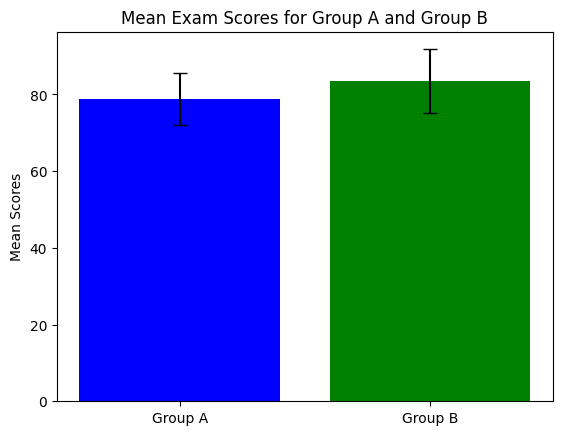


There is no statistically significant difference between Group A and Group B.


In [3]:
# Import necessary libraries
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Group A: Scores of students using the traditional study technique
group_a_scores = np.array([75, 82, 70, 88, 79])

# Group B: Scores of students using the new study technique
group_b_scores = np.array([90, 85, 72, 78, 92])

# Calculate the mean and standard deviation for both groups
mean_a = np.mean(group_a_scores)
mean_b = np.mean(group_b_scores)
std_a = np.std(group_a_scores, ddof=1)  # ddof=1 for sample standard deviation
std_b = np.std(group_b_scores, ddof=1)

print(f"Group A Mean: {mean_a:.2f}, Standard Deviation: {std_a:.2f}")
print(f"Group B Mean: {mean_b:.2f}, Standard Deviation: {std_b:.2f}")

# Perform an independent t-test
t_statistic, p_value = stats.ttest_ind(group_a_scores, group_b_scores)

print(f"\nT-Statistic: {t_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

# Visualize the data
labels = ['Group A', 'Group B']
means = [mean_a, mean_b]
stds = [std_a, std_b]

plt.bar(labels, means, yerr=stds, capsize=5, color=['blue', 'green'])
plt.title("Mean Exam Scores for Group A and Group B")
plt.ylabel("Mean Scores")
plt.show()

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("\nThe difference between Group A and Group B is statistically significant.")
else:
    print("\nThere is no statistically significant difference between Group A and Group B.")


## Results Interpretation

- **Group A Mean**: The average exam score for Group A (students using the traditional study technique).
- **Group B Mean**: The average exam score for Group B (students using the new study technique).
- **T-Statistic**: This tells us how far apart the group means are in terms of standard deviations.
- **P-Value**: This tells us whether the observed difference between the group means is statistically significant.

### Visualization:
We visualize the mean exam scores for both groups with error bars representing the standard deviation.

### Conclusion:
If the p-value is less than 0.05 (our significance level), we can reject the null hypothesis and conclude that there is a statistically significant difference between the two groups. Otherwise, we conclude that there is no significant difference between the two study techniques.


# F-Test: Comparing Variances of Two Machine Learning Models
In this notebook, we will implement an **F-test** to compare the variances of residuals (errors) from two machine learning models. 

### What is the F-Test?

The **F-test** is used to compare the variances between two datasets. The F-test evaluates the ratio of the variances from two groups. If the ratio is significantly different from 1, it suggests that the variances are not equal.

### Steps for F-Test:
1. **Null Hypothesis (H₀)**: The variances of the two groups are the same.
2. **Alternative Hypothesis (H₁)**: The variances of the two groups are different.
3. **F-Ratio**: The ratio of the two variances. If this ratio is significantly different from 1, we reject the null hypothesis.

The formula for the F-test is:

\[
F = \frac{\text{variance of group 1}}{\text{variance of group 2}}
\]

We will compare the residuals from two machine learning models.

### Step 1: Import Libraries
We begin by importing the necessary libraries.


In [4]:
import numpy as np
import scipy.stats as stats


### Step 2: Generate Sample Data for Two Models

Let’s assume we have two machine learning models, **Model A** and **Model B**, and we’ve collected the residuals (errors) from their predictions. The residuals represent the difference between the predicted and actual values.


In [5]:
# Residuals from Model A (traditional model)
model_a_residuals = np.array([2.1, 2.4, 1.9, 3.2, 2.8])

# Residuals from Model B (new model)
model_b_residuals = np.array([1.5, 1.7, 1.4, 1.9, 1.8])

# Display the variances of each group
var_a = np.var(model_a_residuals, ddof=1)  # Sample variance for Model A
var_b = np.var(model_b_residuals, ddof=1)  # Sample variance for Model B

print(f"Variance of Model A Residuals: {var_a:.4f}")
print(f"Variance of Model B Residuals: {var_b:.4f}")


Variance of Model A Residuals: 0.2770
Variance of Model B Residuals: 0.0430


### Step 3: Perform the F-Test

Now, we compute the **F-ratio**, which is simply the ratio of the two variances. We also compute the p-value using the F-distribution to determine whether the difference in variances is statistically significant.

#### Formula for F-Ratio:

\[
F = \frac{S_A^2}{S_B^2}
\]

Where:
- \( S_A^2 \) is the variance of the residuals from Model A.
- \( S_B^2 \) is the variance of the residuals from Model B.

We then compute the p-value using the F-distribution. The degrees of freedom for the two groups are \( df_A = n_A - 1 \) and \( df_B = n_B - 1 \), where \( n_A \) and \( n_B \) are the sample sizes of the two groups.


In [6]:
# Compute F-Ratio
f_ratio = var_a / var_b

# Degrees of freedom
df_a = len(model_a_residuals) - 1  # Degrees of freedom for Model A
df_b = len(model_b_residuals) - 1  # Degrees of freedom for Model B

# Compute the p-value using the F-distribution
p_value = 1 - stats.f.cdf(f_ratio, df_a, df_b)

print(f"F-Ratio: {f_ratio:.4f}")
print(f"P-Value: {p_value:.4f}")


F-Ratio: 6.4419
P-Value: 0.0493


### Step 4: Interpret the Results

We can now interpret the results. If the p-value is below our significance level (commonly set at 0.05), we can reject the null hypothesis and conclude that there is a significant difference between the variances of the two models.

We will use a significance level of **0.05** to determine whether we reject the null hypothesis.



In [7]:
# Significance level
alpha = 0.05

# Decision rule
if p_value < alpha:
    print("We reject the null hypothesis. There is a significant difference between the variances.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference between the variances.")


We reject the null hypothesis. There is a significant difference between the variances.


### Conclusion:
The F-test allows us to compare the variances between two groups. In our example, if the p-value is less than 0.05, it indicates that the variance of the residuals between **Model A** and **Model B** is significantly different.

In summary:
- **F-ratio**: The ratio of variances between the two groups.
- **P-value**: If this value is less than our threshold (0.05), it indicates that there is a significant difference in the variances.


# Wilcoxon Signed-Rank Test: Comparing two paired sets of accuracy measurements.
In this section, we show a **Wilcoxon Signed-Rank Test** to compare the variances of residuals (errors) from two machine learning models. 

### Explanation

Before_tuning and after_tuning are paired data representing the model's accuracy before and after tuning.
The wilcoxon function from the scipy.stats library calculates the Wilcoxon Signed-Rank test statistic and the p-value.
We interpret the result by comparing the p-value to a significance level (alpha = 0.05).

In [8]:
import numpy as np
from scipy.stats import wilcoxon

# Example data: Before and after accuracies of a machine learning model
before_tuning = [0.70, 0.65, 0.75, 0.80, 0.72, 0.68, 0.77, 0.73, 0.74, 0.71]
after_tuning = [0.78, 0.70, 0.79, 0.85, 0.77, 0.73, 0.82, 0.76, 0.81, 0.79]

# Wilcoxon signed-rank test
stat, p = wilcoxon(before_tuning, after_tuning)

print(f"Test Statistic: {stat}")
print(f"P-value: {p}")

# Interpret the result
alpha = 0.05
if p < alpha:
    print("There is a significant difference between before and after tuning (reject H0).")
else:
    print("There is no significant difference between before and after tuning (fail to reject H0).")


Test Statistic: 0.0
P-value: 0.001953125
There is a significant difference between before and after tuning (reject H0).


# Chi-Squared Test for Student Absences Across Weekdays

The principal conducted a survey to determine if student absences are equally distributed across the five weekdays. We will perform a Chi-Squared Goodness-of-Fit test to evaluate whether the observed absences differ significantly from the expected absences (which assumes equal distribution).

## Hypotheses:
- Null Hypothesis (H₀): Absences are equally distributed across the five days of the week.
- Alternative Hypothesis (H₁): Absences are not equally distributed across the five days.

### Observed Absences:
- Monday: 23
- Tuesday: 16
- Wednesday: 14
- Thursday: 19
- Friday: 28

### Expected Absences:
- Each day is expected to have 20 absences (based on equal distribution).

We will now perform the Chi-Squared test using the observed and expected frequencies.


In [1]:
import numpy as np
from scipy.stats import chisquare

# Observed absences
observed = np.array([23, 16, 14, 19, 28])

# Expected absences (equal distribution)
expected = np.array([20, 20, 20, 20, 20])

# Perform Chi-Squared test
chi2_stat, p_val = chisquare(observed, expected)

# Results
print(f"Chi-Squared Statistic: {chi2_stat}")
print(f"P-value: {p_val}")

# Significance level
alpha = 0.05

# Interpretation of results
if p_val < alpha:
    print("Reject the null hypothesis. Absences are not equally distributed across the days.")
else:
    print("Fail to reject the null hypothesis. Absences are equally distributed across the days.")


Chi-Squared Statistic: 6.3
P-value: 0.1778363264982168
Fail to reject the null hypothesis. Absences are equally distributed across the days.


# One-Way ANOVA Test

A **one-way ANOVA (Analysis of Variance)** test is used to compare the means of three or more independent groups to see if there is a statistically significant difference between them. It tests the null hypothesis that all group means are equal, against the alternative hypothesis that at least one group mean is different.

### Purpose of One-Way ANOVA:
- **Null Hypothesis (\(H_0\))**: The means of all groups (in this case, the time spent on different web pages) are equal.
- **Alternative Hypothesis (\(H_1\))**: At least one group mean is different from the others.

### When to Use One-Way ANOVA:
- When you have one categorical independent variable (in this case, the web page) with three or more levels (here, pages 1, 2, 3, and 4).
- The dependent variable is continuous (here, the time spent on the web page).

### Example:
The following example compares the time spent by users on four different web pages. We'll use Python to run a one-way ANOVA test and determine if the average time spent differs significantly between the pages.


In [2]:
# Importing required libraries
import scipy.stats as stats

# Data for each web page (time spent by users in seconds)
page1 = [164.6, 166.1, 166.0, 163.6, 167.1]
page2 = [174.9, 175.6, 175.3, 176.1, 176.1]
page3 = [170.0, 170.0, 170.7, 169.2, 169.9]
page4 = [159.9, 160.9, 159.2, 158.4, 159.4]

# Performing one-way ANOVA
f_statistic, p_value = stats.f_oneway(page1, page2, page3, page4)

# Outputting the F-statistic and p-value
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference in the mean time spent on at least one web page.")
else:
    print("There is no statistically significant difference in the mean time spent across the web pages.")


F-statistic: 279.9386416389143
P-value: 4.941119462325864e-14
There is a statistically significant difference in the mean time spent on at least one web page.
